Imports

In [137]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype

Load data for optimal cluster number plotting

In [117]:
data_set = 'IF_HC' # IF_HC, IF_DL, CP_HC, CP_DL

df = pd.read_csv(fr'Data\gmm_gridResults_{data_set}.csv')

Plotting

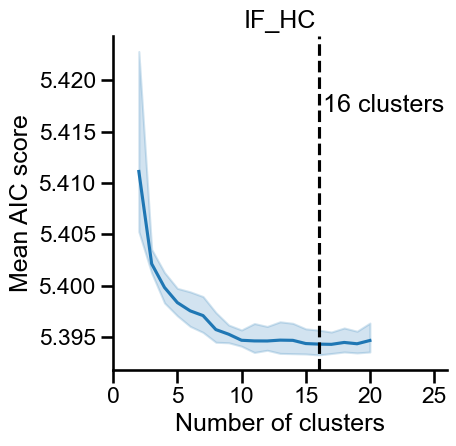

In [118]:
# Plot aesthetics
# Set the style and font
plt.rcParams['font.family'] = 'Arial'
sns.set_context('talk')

# Find the row with the minimum aic score
min_aic_row = df.loc[df['mean_test_aic'].idxmin()]
min_components = min_aic_row['param_n_components']
min_aic_value = min_aic_row['mean_test_aic']

# Create the lineplot
ax = sns.lineplot(data=df, x='param_n_components', y='mean_test_aic')

# Add vertical dashed line at the minimum aic
plt.axvline(x=min_components, color='black', linestyle='--', label=f'{int(min_components)} clusters')


# Dynamically calculate offset based on data range
y_range = df['mean_test_aic'].max() - df['mean_test_aic'].min()
x_range = df['param_n_components'].max() - df['param_n_components'].min()

# Annotate the line with the number of clusters using dynamic offset
plt.text(min_components + 0.02 * x_range,
         min_aic_value + 0.8 * y_range,
         f'{int(min_components)} clusters',
         color='black')

# Customize plot
sns.despine()
plt.title(data_set)
plt.xlabel('Number of clusters')
plt.ylabel('Mean AIC score')
ax.set_box_aspect(1)
plt.tight_layout()
plt.xticks([0, 5, 10, 15, 20, 25])
plt.xlim(0, 26)

# Save the plot
plt.savefig(f'OptimalCLusterNumber_{data_set}.pdf', bbox_inches='tight')
plt.show()


Load data for UMAP plotting

In [145]:
data_set = 'IF_HC' # IF_HC, IF_DL, CP_HC, CP_DL

df_umap = pd.read_feather(rf"Data\umap_train_clusters_{data_set}.fth")

# Change treatment names
df_umap['Treatment'] = df_umap['Treatment'].replace({
    'Unprimed/Unactivated': 'Untreated',
    'LPS/Unactivated': 'LPS',
    'Unprimed/Nigericin': 'Nigericin',
    'LPS/Nigericin': 'LPS/Nigericin'
    })

Plotting UMAP

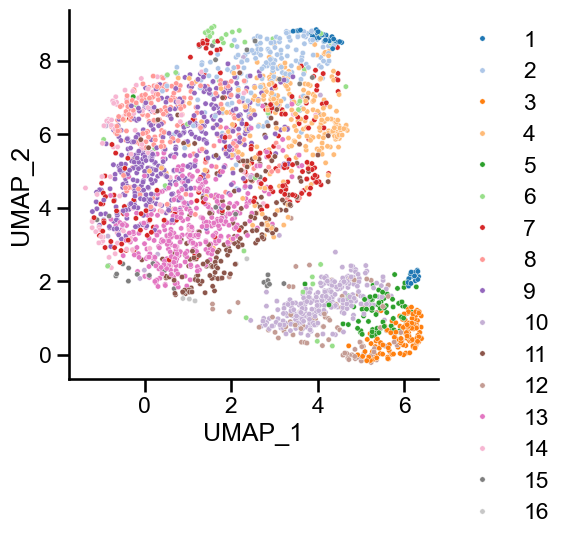

In [146]:
# Randomly choose data for easier plot interpretation
df_sampled = df_umap.sample(frac=0.2, random_state=42)
# Remove unassigned cells (cluster -1)
df_sampled = df_sampled[df_sampled['membership'] != '-1']

# Convert membership to ordered categorical type
membership_order = sorted(df_sampled['membership'].unique(), key=lambda x: int(x))
cat_type = CategoricalDtype(categories=membership_order, ordered=True)
df_sampled['membership'] = df_sampled['membership'].astype(cat_type)

# Create a scatter plot
ax = sns.scatterplot(data=df_sampled, x='emb1', y='emb2', hue='membership', s=15, alpha=1, palette='tab20')
ax.set_box_aspect(1)

# Move the legend to the top right corner
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

# Plot refinement
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')

# Saving plot
plt.savefig(f'UMAP_clusters_{data_set}.pdf', bbox_inches='tight')
plt.savefig(f'UMAP_clusters_{data_set}.png', bbox_inches='tight')

# Show the plot
plt.show()

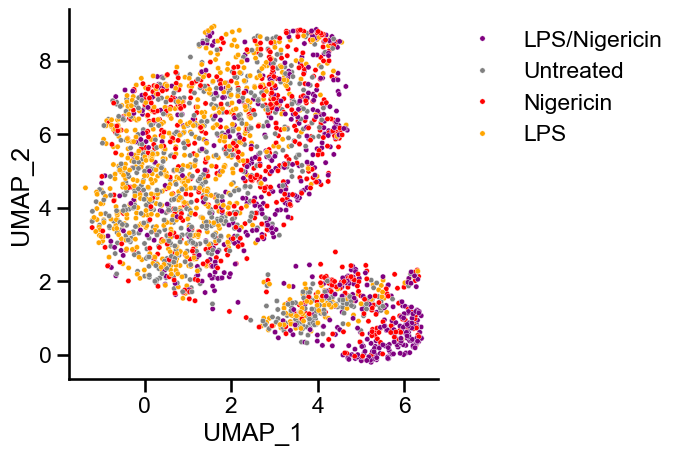

In [147]:
# Set colors
# Define a dictionary that maps categories to colors
color_dict = {'Untreated': 'gray', 'LPS': 'orange', 'Nigericin': 'red', 'LPS/Nigericin': 'purple'}

# Create a scatter plot
ax = sns.scatterplot(data=df_sampled, x='emb1', y='emb2', hue='Treatment', s=15, alpha=1, palette=color_dict)
ax.set_box_aspect(1)

# Move the legend to the top right corner
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=False)
sns.despine()

# Plot refinement
ax.set_xlabel('UMAP_1')
ax.set_ylabel('UMAP_2')

# Saving plot
plt.savefig(f'UMAP_Treatment_{data_set}.pdf', bbox_inches='tight')
plt.savefig(f'UMAP_Treatment_{data_set}.png', bbox_inches='tight')

# Show the plot
plt.show()